In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "../Data/"

# Read Co-variants Data

In [3]:
covariant = pd.read_csv(path + 'Mutations.csv', sep=';')

## Data understanding

In [4]:
covariant

,ID,Virus name,Accession ID,Day,Month,Year,Location,Country,Dpto,Latitude,...,Patient age,Patient status,Last vaccinated,Passage,Specimen,Additional host information,Lineage,Lineage__color,Variant,Variant__color
0,1,hCoV-19/Colombia/ANT-CWOHC-VG-SEC0001A/2021,EPI_ISL_1015353,3,1.0,2021.0,South America,Colombia,Antioquia,"6,702032125",...,38,Live,NaN,Original,Nasopharyngeal swab,Not hospitalized,B.1.1.348,#6495ed,Otro,#57a639
1,2,hCoV-19/Colombia/ANT-CWOHC-VG-SEC0002B/2021,EPI_ISL_1015354,5,1.0,2021.0,South America,Colombia,Antioquia,"6,702032125",...,24,Live,NaN,Original,Nasopharyngeal swab,Not hospitalized,B.1.111,#ff00ff,Otro,#57a639
2,3,hCoV-19/Colombia/ANT-CWOHC-VG-SEC0003C/2021,EPI_ISL_1015355,5,1.0,2021.0,South America,Colombia,Antioquia,"6,702032125",...,66,Live,NaN,Original,Nasopharyngeal swab,Not hospitalized,B.1.111,#ff00ff,Otro,#57a639
3,4,hCoV-19/Colombia/ANT-CWOHC-VG-SEC0004D/2021,EPI_ISL_1015356,12,1.0,2021.0,South America,Colombia,Antioquia,"6,702032125",...,27,Live,NaN,Original,Nasopharyngeal swab,Not hospitalized,B.1.596,#808080,Otro,#57a639
4,5,hCoV-19/Colombia/ANT-CWOHC-VG-SEC0005E/2021,EPI_ISL_1015357,12,1.0,2021.0,South America,Colombia,Antioquia,"6,702032125",...,25,Live,NaN,Original,Nasopharyngeal swab,Not hospitalized,B.1,#ffa500,Otro,#57a639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,2962,hCoV-19/Colombia/DC-INS-VG-606/2021,EPI_ISL_956303,17,1.0,2021.0,South America,Colombia,Bogota,"4,316107698",...,33,Live,NaN,Original,Nasopharyngeal swab,NaN,B.1.177,#c0c0c0,Otro,#57a639
2962,2963,hCoV-19/Colombia/DC-INS-VG-456/2021,EPI_ISL_956304,10,1.0,2021.0,South America,Colombia,Bogota,"4,316107698",...,83,unknown,NaN,Original,Nasopharyngeal swab,NaN,B.1.420,#000080,Otro,#57a639
2963,2964,hCoV-19/Colombia/DC-INS-VG-457/2021,EPI_ISL_956305,10,1.0,2021.0,South America,Colombia,Bogota,"4,316107698",...,29,unknown,NaN,Original,Nasopharyngeal swab,NaN,B.1.1.348,#6495ed,Otro,#57a639
2964,2965,hCoV-19/Colombia/PUT-INS-CVN2151/2020,EPI_ISL_956306,5,10.0,2020.0,South America,Colombia,Putumayo,"0,3673031",...,29,Live,NaN,Original,Nasopharyngeal swab,NaN,B.1.1,#00ffff,Otro,#57a639


## filter data

In [5]:
columns = ['Day', 'Month', 'Year', 'Dpto', 'Latitude', 'Longitude', 'City', 'Gender', 'Patient age', 'Patient status', 'Variant']
covariant = covariant[columns]
covariant

,Day,Month,Year,Dpto,Latitude,Longitude,City,Gender,Patient age,Patient status,Variant
0,3,1.0,2021.0,Antioquia,"6,702032125","-75,50455704",NaN,Male,38,Live,Otro
1,5,1.0,2021.0,Antioquia,"6,702032125","-75,50455704",NaN,Male,24,Live,Otro
2,5,1.0,2021.0,Antioquia,"6,702032125","-75,50455704",NaN,Male,66,Live,Otro
3,12,1.0,2021.0,Antioquia,"6,702032125","-75,50455704",NaN,Female,27,Live,Otro
4,12,1.0,2021.0,Antioquia,"6,702032125","-75,50455704",NaN,Female,25,Live,Otro
...,...,...,...,...,...,...,...,...,...,...,...
2961,17,1.0,2021.0,Bogota,"4,316107698","-74,1810727",NaN,Female,33,Live,Otro
2962,10,1.0,2021.0,Bogota,"4,316107698","-74,1810727",NaN,Male,83,unknown,Otro
2963,10,1.0,2021.0,Bogota,"4,316107698","-74,1810727",NaN,Male,29,unknown,Otro
2964,5,10.0,2020.0,Putumayo,"0,3673031","-75,51406183",NaN,Male,29,Live,Otro


In [6]:
# See null columns
covariant.isnull().sum()

Day                  0
Month              150
Year               150
Dpto                 0
Latitude           122
Longitude          122
City              1247
Gender              14
Patient age         14
Patient status      13
Variant              0
dtype: int64

# Pre-processing

In [7]:
# Drop null dates
covariant = covariant[~covariant.Month.isnull()]

# See null columns
covariant.isnull().sum()

Day                  0
Month                0
Year                 0
Dpto                 0
Latitude           122
Longitude          122
City              1097
Gender               1
Patient age          1
Patient status       1
Variant              0
dtype: int64

In [8]:
# Set Data type as int
date_columns = ['Day', 'Month', 'Year']
covariant[date_columns] = covariant[date_columns].astype('int')
covariant[date_columns].dtypes

/Users/davidrestrepo/opt/anaconda3/envs/Covid19_Nasa/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Day      int64
Month    int64
Year     int64
dtype: object

In [9]:
def merge_dates(x):
    #print(x)
    #print("----")
    return str(x[0]) + '-' + str(x[1]) + '-' + str(x[2])

In [10]:
# Get Date in Day - Month - Year format
covariant['Date'] = covariant[date_columns].apply(merge_dates, axis = 1)
covariant['Date'] = pd.to_datetime(covariant['Date'])
# Drop Day, Month, Year
covariant.drop(columns = date_columns, axis=1, inplace=True)
covariant.head(3)

/Users/davidrestrepo/opt/anaconda3/envs/Covid19_Nasa/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/davidrestrepo/opt/anaconda3/envs/Covid19_Nasa/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davidrestrepo/opt/anaconda3/envs/Covid19_Nasa/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarn

,Dpto,Latitude,Longitude,City,Gender,Patient age,Patient status,Variant,Date
0,Antioquia,"6,702032125","-75,50455704",NaN,Male,38,Live,Otro,2021-03-01
1,Antioquia,"6,702032125","-75,50455704",NaN,Male,24,Live,Otro,2021-05-01
2,Antioquia,"6,702032125","-75,50455704",NaN,Male,66,Live,Otro,2021-05-01


In [11]:
# See null columns
covariant.isnull().sum()

Dpto                 0
Latitude           122
Longitude          122
City              1097
Gender               1
Patient age          1
Patient status       1
Variant              0
Date                 0
dtype: int64

In [12]:
covariant = covariant[~covariant.Gender.isnull()]
# See null columns
covariant.isnull().sum()

Dpto                 0
Latitude           122
Longitude          122
City              1096
Gender               0
Patient age          0
Patient status       0
Variant              0
Date                 0
dtype: int64

## latitude - longitude

In [13]:
# Convert from String to Float
# Change , by .
covariant['Latitude'] = covariant['Latitude'].str.replace(",", ".")
covariant['Longitude'] = covariant['Longitude'].str.replace(",", ".")

# Convert from Object to Float
covariant[['Latitude', 'Longitude']] = covariant[['Latitude', 'Longitude']].astype('float64')

# Reset Index
covariant = covariant.reset_index()
covariant.drop(columns=['index'], inplace = True)

In [14]:
# Impute the data for Latitude and Longitude
def impute_coordinates(x):
    latitude, longitude, department = x[0], x[1], x[2]
    print(latitude)
    print(type(latitude))
    
    if latitude == np.nan:
        print(latitude)
        latitude = covariant.loc[covariant['Dpto'] == department, 'Latitude'].dropna()[0]
    
    if longitude == np.nan:
        longitude = covariant.loc[covariant['Dpto'] == department, 'Longitude'].dropna()[0]
    
    x[0], x[1], x[2] = latitude, longitude, department
    print('_____')
    return x

In [15]:
covariant[['Latitude', 'Longitude']] = covariant[['Latitude', 'Longitude']].fillna(np.nan)

#covariant[['Latitude', 'Longitude', 'Dpto']].apply(lambda x: impute_coordinates(x), axis=1)


for i in range(0,len(covariant)):
    department = covariant.iloc[i]['Dpto']
    
    latitude = covariant.iloc[i].isnull()['Latitude']
    longitude = covariant.iloc[i].isnull()['Longitude']

    if latitude and longitude:
        covariant.loc[i, 'Latitude'] = covariant.loc[covariant['Dpto'] == department, 'Latitude'].dropna()[0]
        covariant.loc[i, 'Longitude'] = covariant.loc[covariant['Dpto'] == department, 'Longitude'].dropna()[0]
    #if longitude:
    #    covariant.loc[i, 'Longitude'] = covariant.loc[covariant['Dpto'] == department, 'Longitude'].dropna()[0]

covariant

,Dpto,Latitude,Longitude,City,Gender,Patient age,Patient status,Variant,Date
0,Antioquia,6.702032,-75.504557,NaN,Male,38,Live,Otro,2021-03-01
1,Antioquia,6.702032,-75.504557,NaN,Male,24,Live,Otro,2021-05-01
2,Antioquia,6.702032,-75.504557,NaN,Male,66,Live,Otro,2021-05-01
3,Antioquia,6.702032,-75.504557,NaN,Female,27,Live,Otro,2021-12-01
4,Antioquia,6.702032,-75.504557,NaN,Female,25,Live,Otro,2021-12-01
...,...,...,...,...,...,...,...,...,...
2810,Cordoba,8.358550,-75.792009,NaN,Male,29,Live,None,2021-01-22
2811,Bogota,4.316108,-74.181073,NaN,Female,33,Live,Otro,2021-01-17
2812,Bogota,4.316108,-74.181073,NaN,Male,83,unknown,Otro,2021-10-01
2813,Bogota,4.316108,-74.181073,NaN,Male,29,unknown,Otro,2021-10-01


In [16]:
covariant.isnull().sum()

Dpto                 0
Latitude             0
Longitude            0
City              1096
Gender               0
Patient age          0
Patient status       0
Variant              0
Date                 0
dtype: int64

In [17]:
covariant.dtypes

Dpto                      object
Latitude                 float64
Longitude                float64
City                      object
Gender                    object
Patient age               object
Patient status            object
Variant                   object
Date              datetime64[ns]
dtype: object

# Visualization

In [18]:
# All
columns = ['Dpto', 'Latitude', 'Longitude', 'City', 'Gender', 'Patient age', 'Patient status', 'Variant']
# Some Columns
columns = ['Date', 'Dpto', 'Latitude', 'Longitude', 'Variant']

covariant = covariant[columns]

In [19]:
covariant.Dpto = covariant.Dpto.str.lower()

/Users/davidrestrepo/opt/anaconda3/envs/Covid19_Nasa/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
covariant.head()

,Date,Dpto,Latitude,Longitude,Variant
0,2021-03-01,antioquia,6.702032,-75.504557,Otro
1,2021-05-01,antioquia,6.702032,-75.504557,Otro
2,2021-05-01,antioquia,6.702032,-75.504557,Otro
3,2021-12-01,antioquia,6.702032,-75.504557,Otro
4,2021-12-01,antioquia,6.702032,-75.504557,Otro


In [21]:
pd.unique(covariant.Variant)

array(['Otro', 'None', 'Gamma', 'Mu', 'B.1.625', 'Alpha', 'Iota',
       'Lambda', 'Delta'], dtype=object)

In [22]:
# number of dates
len(pd.unique(covariant.Date))

373

### Latitude and Longitude by Department

In [50]:
lat_lon = covariant[['Dpto', 'Latitude', 'Longitude']]

lat_lon = lat_lon.drop_duplicates()
lat_lon = lat_lon.reset_index()
lat_lon.drop(columns=['index'], inplace = True)
lat_lon.index = lat_lon['Dpto']
lat_lon.drop(columns=['Dpto'], inplace=True)
lat_lon

,Latitude,Longitude
Dpto,,
antioquia,6.702032,-75.504557
bogota,4.316108,-74.181073
boyaca,5.891673,-72.627881
magdalena,10.247384,-74.261757
amazonas,-1.546228,-71.502129
putumayo,0.367303,-75.514062
valledelcauca,3.569859,-76.628504
atlantico,10.677010,-74.965219
cordoba,8.358550,-75.792009


# Calculate total cases

In [24]:
covariant_group = covariant.groupby(['Date', 'Dpto']).count()
covariant_group['cases'] = covariant_group['Variant']

covariant_group_date = covariant_group['cases']
covariant_group_date = covariant_group_date.reset_index().dropna()
covariant_group_date

,Date,Dpto,cases
0,2020-01-04,antioquia,2
1,2020-01-04,cordoba,1
2,2020-01-04,cundinamarca,1
3,2020-01-04,magdalena,2
4,2020-01-04,valledelcauca,10
...,...,...,...
1155,2021-12-07,antioquia,1
1156,2021-12-07,atlantico,1
1157,2021-12-07,cesar,1
1158,2021-12-07,sucre,2


In [25]:
covariant_cases = covariant_group_date.merge(covariant, on=['Date', 'Dpto'], how='inner')
covariant_cases

,Date,Dpto,cases,Latitude,Longitude,Variant
0,2020-01-04,antioquia,2,6.702032,-75.504557,Otro
1,2020-01-04,antioquia,2,6.702032,-75.504557,Otro
2,2020-01-04,cordoba,1,8.358550,-75.792009,Otro
3,2020-01-04,cundinamarca,1,4.771121,-74.431111,Otro
4,2020-01-04,magdalena,2,10.247384,-74.261757,Otro
...,...,...,...,...,...,...
2810,2021-12-07,atlantico,1,10.677010,-74.965219,Mu
2811,2021-12-07,cesar,1,9.536660,-73.517832,Mu
2812,2021-12-07,sucre,2,9.302333,-75.395484,Mu
2813,2021-12-07,sucre,2,9.302333,-75.395484,Mu


In [26]:
pd.unique(covariant.Variant)

array(['Otro', 'None', 'Gamma', 'Mu', 'B.1.625', 'Alpha', 'Iota',
       'Lambda', 'Delta'], dtype=object)

# Create table

In [27]:
table = pd.pivot_table(covariant_cases, values=['cases'], index=['Dpto'],
                     columns=['Date'], aggfunc=np.sum).fillna(0)

table.columns = table.columns.droplevel(0)
table = table.merge(lat_lon, left_index=True, right_index=True)
table = table.T.reset_index()

table_all = table.rename(columns={'index': 'Date'})
table_all

Dpto,Date,amazonas,antioquia,arauca,atlantico,bogota,bolivar,boyaca,caldas,caqueta,...,putumayo,quindio,risaralda,sanandres,santander,sucre,tolima,valledelcauca,vaupes,vichada
0,2020-01-04 00:00:00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
1,2020-01-05 00:00:00,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-01-07 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2020-01-12 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2020-02-04 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2021-12-06 00:00:00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
371,2021-12-07 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
372,2021-12-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
373,Latitude,-1.546228,6.702032,6.569577,10.677010,4.316108,8.079797,5.891673,5.280140,0.798556,...,0.367303,4.455242,5.240757,12.543115,6.693633,9.302333,4.034773,3.569859,0.646246,4.713557


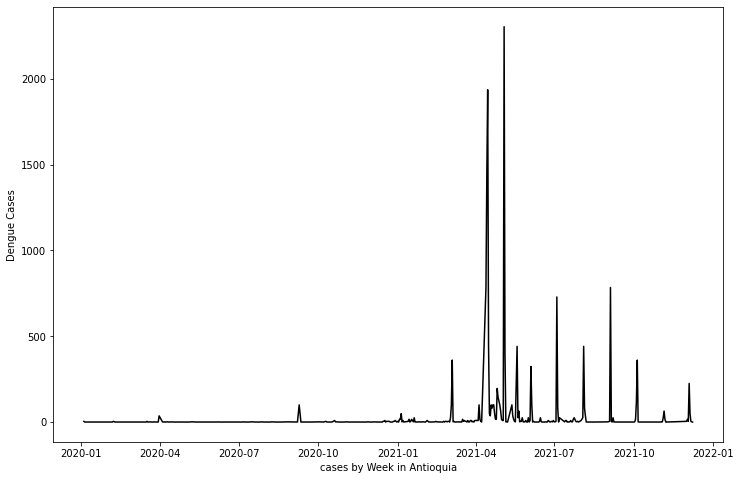

In [28]:
import matplotlib.pyplot as plt

# Dengue cases in time
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (12, 8))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label) 
    plt.ylabel('Dengue Cases')

timeseries(table_all['Date'][:-2], table_all['antioquia'][:-2], 'cases by Week in Antioquia')

In [29]:
# Download Dataframe
out_path = '../Data/'
# Download Data as csv
table_all.to_csv(out_path + 'Covid19_mutation_preprocessed.csv')

# Mutations

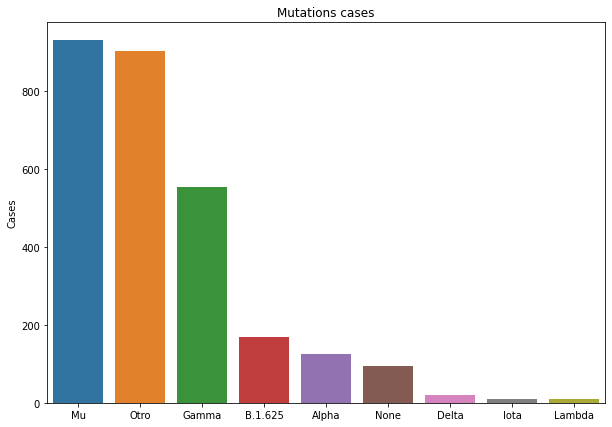

In [30]:
# Variants
plt.figure(figsize=(10,7))
plt.title('Mutations cases')
plt.ylabel('Cases')
sns.barplot(x=covariant.Variant.value_counts().index, y=covariant.Variant.value_counts().values)
plt.show()

# Calculate Mu cases

In [31]:
# Variants
covariant_mu = covariant[covariant.Variant == 'Mu']
covariant_mu

,Date,Dpto,Latitude,Longitude,Variant
52,2021-11-01,magdalena,10.247384,-74.261757,Mu
100,2021-02-26,magdalena,10.247384,-74.261757,Mu
101,2021-02-27,magdalena,10.247384,-74.261757,Mu
138,2021-02-26,laguajira,11.476870,-72.429511,Mu
139,2021-02-03,laguajira,11.476870,-72.429511,Mu
...,...,...,...,...,...
2331,2021-01-07,atlantico,10.677010,-74.965219,Mu
2332,2021-06-07,sucre,9.302333,-75.395484,Mu
2333,2021-07-20,atlantico,10.677010,-74.965219,Mu
2334,2021-01-07,bolivar,8.079797,-74.235148,Mu


In [32]:
covariant_mu_group = covariant_mu.groupby(['Date', 'Dpto']).count()
covariant_mu_group['cases'] = covariant_mu_group['Variant']

covariant_mu_group_date = covariant_mu_group['cases']
covariant_mu_group_date = covariant_mu_group_date.reset_index().dropna()
covariant_mu_group_date

,Date,Dpto,cases
0,2021-01-04,antioquia,2
1,2021-01-04,laguajira,2
2,2021-01-04,valledelcauca,1
3,2021-01-05,antioquia,3
4,2021-01-05,cesar,2
...,...,...,...
467,2021-12-06,valledelcauca,2
468,2021-12-07,atlantico,1
469,2021-12-07,cesar,1
470,2021-12-07,sucre,2


In [33]:
covariant_mu_cases = covariant_mu_group_date.merge(covariant_mu, on=['Date', 'Dpto'], how='inner')
covariant_mu_cases

,Date,Dpto,cases,Latitude,Longitude,Variant
0,2021-01-04,antioquia,2,6.702032,-75.504557,Mu
1,2021-01-04,antioquia,2,6.702032,-75.504557,Mu
2,2021-01-04,laguajira,2,11.476870,-72.429511,Mu
3,2021-01-04,laguajira,2,11.476870,-72.429511,Mu
4,2021-01-04,valledelcauca,1,3.569859,-76.628504,Mu
...,...,...,...,...,...,...
925,2021-12-07,atlantico,1,10.677010,-74.965219,Mu
926,2021-12-07,cesar,1,9.536660,-73.517832,Mu
927,2021-12-07,sucre,2,9.302333,-75.395484,Mu
928,2021-12-07,sucre,2,9.302333,-75.395484,Mu


In [34]:
table = pd.pivot_table(covariant_mu_cases, values=['cases'], index=['Dpto'],
                     columns=['Date'], aggfunc=np.sum).fillna(0)

table.columns = table.columns.droplevel(0)
table = table.merge(lat_lon, left_index=True, right_index=True)
table = table.T.reset_index()

table_mu = table.rename(columns={'index': 'Date'})


table_mu

Dpto,Date,amazonas,antioquia,arauca,atlantico,bogota,bolivar,boyaca,caldas,caqueta,...,nortedesantander,quindio,risaralda,sanandres,santander,sucre,tolima,valledelcauca,vaupes,vichada
0,2021-01-04 00:00:00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,2021-01-05 00:00:00,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021-01-06 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-01-07 00:00:00,0.000000,9.000000,0.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,2021-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2021-12-06 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
156,2021-12-07 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
157,2021-12-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
158,Latitude,-1.546228,6.702032,6.569577,10.677010,4.316108,8.079797,5.891673,5.280140,0.798556,...,8.095138,4.455242,5.240757,12.543115,6.693633,9.302333,4.034773,3.569859,0.646246,4.713557


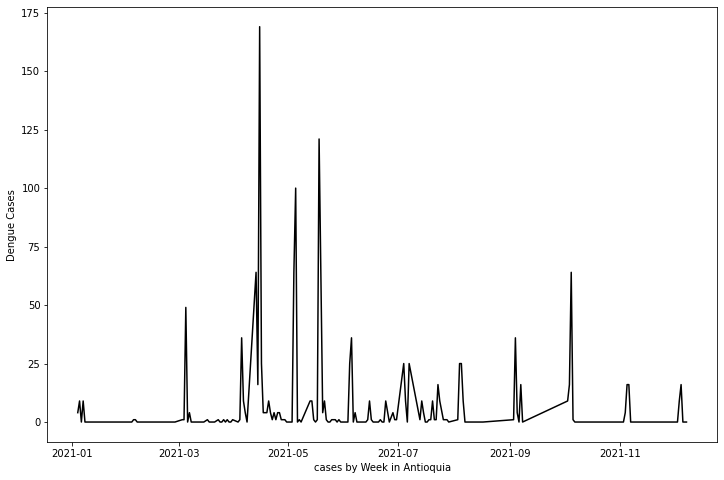

In [35]:
import matplotlib.pyplot as plt

# Dengue cases in time
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (12, 8))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label) 
    plt.ylabel('Dengue Cases')

timeseries(table_mu['Date'][:-2], table_mu['antioquia'][:-2], 'cases by Week in Antioquia')

In [36]:
# Download Dataframe
out_path = '../Data/'
# Download Data as csv
table_mu.to_csv(out_path + 'Covid19_mu_preprocessed.csv')

# Calculate Gamma cases

In [37]:
# Variants
covariant_mu = covariant[covariant.Variant == 'Gamma']
covariant_mu

,Date,Dpto,Latitude,Longitude,Variant
13,2021-01-30,amazonas,-1.546228,-71.502129,Gamma
21,2021-01-02,amazonas,-1.546228,-71.502129,Gamma
46,2021-05-02,amazonas,-1.546228,-71.502129,Gamma
48,2021-01-30,amazonas,-1.546228,-71.502129,Gamma
49,2021-06-02,amazonas,-1.546228,-71.502129,Gamma
...,...,...,...,...,...
2799,2021-01-22,amazonas,-1.546228,-71.502129,Gamma
2800,2021-01-22,amazonas,-1.546228,-71.502129,Gamma
2801,2021-01-20,amazonas,-1.546228,-71.502129,Gamma
2803,2021-01-21,amazonas,-1.546228,-71.502129,Gamma


In [38]:
covariant_mu_group = covariant_mu.groupby(['Date', 'Dpto']).count()
covariant_mu_group['cases'] = covariant_mu_group['Variant']

covariant_mu_group_date = covariant_mu_group['cases']
covariant_mu_group_date = covariant_mu_group_date.reset_index().dropna()
covariant_mu_group_date

,Date,Dpto,cases
0,2020-12-17,antioquia,1
1,2021-01-02,amazonas,1
2,2021-01-04,antioquia,2
3,2021-01-05,antioquia,3
4,2021-01-05,caqueta,1
...,...,...,...
232,2021-12-04,valledelcauca,1
233,2021-12-05,antioquia,2
234,2021-12-05,bogota,3
235,2021-12-06,antioquia,1


In [39]:
covariant_mu_cases = covariant_mu_group_date.merge(covariant_mu, on=['Date', 'Dpto'], how='inner')
covariant_mu_cases

,Date,Dpto,cases,Latitude,Longitude,Variant
0,2020-12-17,antioquia,1,6.702032,-75.504557,Gamma
1,2021-01-02,amazonas,1,-1.546228,-71.502129,Gamma
2,2021-01-04,antioquia,2,6.702032,-75.504557,Gamma
3,2021-01-04,antioquia,2,6.702032,-75.504557,Gamma
4,2021-01-05,antioquia,3,6.702032,-75.504557,Gamma
...,...,...,...,...,...,...
548,2021-12-05,bogota,3,4.316108,-74.181073,Gamma
549,2021-12-05,bogota,3,4.316108,-74.181073,Gamma
550,2021-12-05,bogota,3,4.316108,-74.181073,Gamma
551,2021-12-06,antioquia,1,6.702032,-75.504557,Gamma


In [40]:
table = pd.pivot_table(covariant_mu_cases, values=['cases'], index=['Dpto'],
                     columns=['Date'], aggfunc=np.sum).fillna(0)

table.columns = table.columns.droplevel(0)
table = table.merge(lat_lon, left_index=True, right_index=True)
table = table.T.reset_index()

table_gamma = table.rename(columns={'index': 'Date'})

table_gamma

Dpto,Date,amazonas,antioquia,arauca,atlantico,bogota,bolivar,boyaca,caldas,caqueta,...,narino,putumayo,quindio,risaralda,sanandres,santander,sucre,tolima,valledelcauca,vichada
0,2020-12-17 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-01-02 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021-01-04 00:00:00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-01-05 00:00:00,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2021-01-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2021-12-04 00:00:00,1.000000,64.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
120,2021-12-05 00:00:00,0.000000,4.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
121,2021-12-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
122,Latitude,-1.546228,6.702032,6.569577,10.677010,4.316108,8.079797,5.891673,5.280140,0.798556,...,1.571095,0.367303,4.455242,5.240757,12.543115,6.693633,9.302333,4.034773,3.569859,4.713557


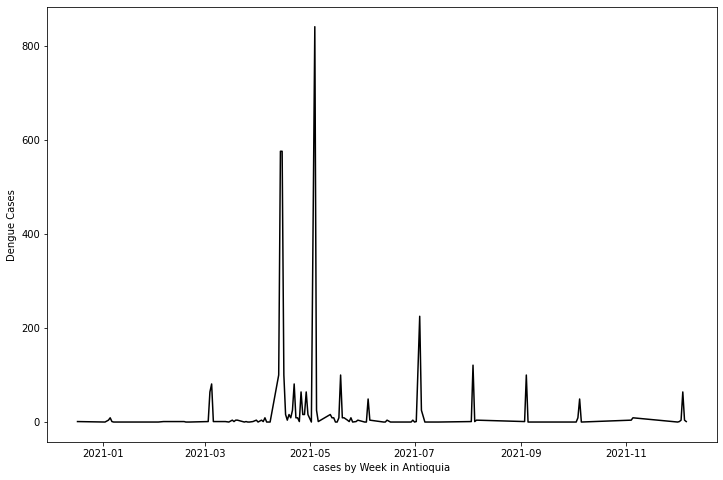

In [41]:
import matplotlib.pyplot as plt

# Dengue cases in time
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (12, 8))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label) 
    plt.ylabel('Dengue Cases')

timeseries(table_gamma['Date'][:-2], table_gamma['antioquia'][:-2], 'cases by Week in Antioquia')

In [42]:
# Download Dataframe
out_path = '../Data/'
# Download Data as csv
table_gamma.to_csv(out_path + 'Covid19_gamma_preprocessed.csv')

# Calculate Alpha cases

In [43]:
# Variants
covariant_mu = covariant[covariant.Variant == 'Alpha']
covariant_mu

,Date,Dpto,Latitude,Longitude,Variant
158,2021-02-15,caldas,5.280140,-75.274983,Alpha
159,2021-02-19,caldas,5.280140,-75.274983,Alpha
160,2021-10-03,bogota,4.316108,-74.181073,Alpha
161,2021-05-04,bogota,4.316108,-74.181073,Alpha
162,2021-03-22,bogota,4.316108,-74.181073,Alpha
...,...,...,...,...,...
1790,2021-01-05,risaralda,5.240757,-76.002445,Alpha
1791,2021-04-19,risaralda,5.240757,-76.002445,Alpha
1800,2021-04-19,valledelcauca,3.569859,-76.628504,Alpha
1915,2021-03-04,cordoba,8.358550,-75.792009,Alpha


In [44]:
covariant_mu_group = covariant_mu.groupby(['Date', 'Dpto']).count()
covariant_mu_group['cases'] = covariant_mu_group['Variant']

covariant_mu_group_date = covariant_mu_group['cases']
covariant_mu_group_date = covariant_mu_group_date.reset_index().dropna()
covariant_mu_group_date

,Date,Dpto,cases
0,2021-01-04,bogota,1
1,2021-01-04,valledelcauca,1
2,2021-01-05,risaralda,1
3,2021-01-14,antioquia,1
4,2021-02-15,caldas,1
...,...,...,...
71,2021-11-04,quindio,1
72,2021-11-04,valledelcauca,1
73,2021-12-04,bogota,7
74,2021-12-04,narino,1


In [45]:
covariant_mu_cases = covariant_mu_group_date.merge(covariant_mu, on=['Date', 'Dpto'], how='inner')
covariant_mu_cases

,Date,Dpto,cases,Latitude,Longitude,Variant
0,2021-01-04,bogota,1,4.316108,-74.181073,Alpha
1,2021-01-04,valledelcauca,1,3.569859,-76.628504,Alpha
2,2021-01-05,risaralda,1,5.240757,-76.002445,Alpha
3,2021-01-14,antioquia,1,6.702032,-75.504557,Alpha
4,2021-02-15,caldas,1,5.280140,-75.274983,Alpha
...,...,...,...,...,...,...
120,2021-12-04,bogota,7,4.316108,-74.181073,Alpha
121,2021-12-04,bogota,7,4.316108,-74.181073,Alpha
122,2021-12-04,bogota,7,4.316108,-74.181073,Alpha
123,2021-12-04,narino,1,1.571095,-77.870205,Alpha


In [46]:
table = pd.pivot_table(covariant_mu_cases, values=['cases'], index=['Dpto'],
                     columns=['Date'], aggfunc=np.sum).fillna(0)

table.columns = table.columns.droplevel(0)
table = table.merge(lat_lon, left_index=True, right_index=True)
table = table.T.reset_index()

table_alpha = table.rename(columns={'index': 'Date'})


table_alpha

Dpto,Date,antioquia,bogota,caldas,cordoba,cundinamarca,narino,nortedesantander,quindio,risaralda,santander,valledelcauca
0,2021-01-04 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,2021-01-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,2021-01-14 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-02-15 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2021-02-19 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2021-02-26 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2021-03-04 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2021-03-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
8,2021-03-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2021-03-18 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


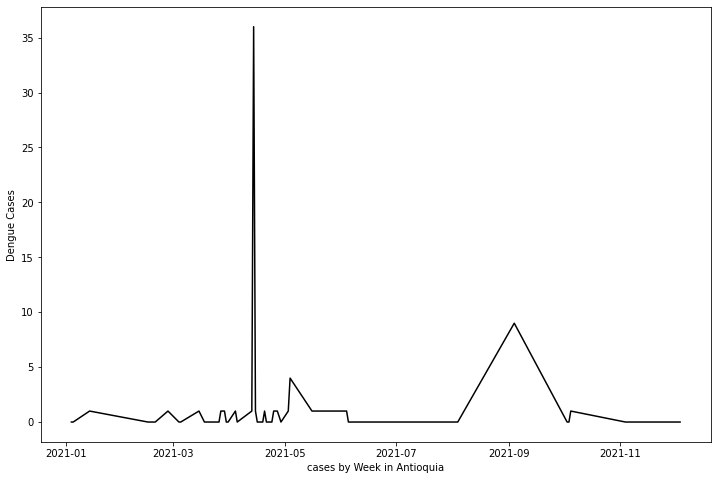

In [47]:
import matplotlib.pyplot as plt

# Dengue cases in time
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (12, 8))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label) 
    plt.ylabel('Dengue Cases')

timeseries(table_alpha['Date'][:-2], table_alpha['antioquia'][:-2], 'cases by Week in Antioquia')

In [48]:
# Download Dataframe
out_path = '../Data/'
# Download Data as csv
table_alpha.to_csv(out_path + 'Covid19_alpha_preprocessed.csv')

In [34]:
municipality_code_df = pd.read_csv(path + 'DIVIPOLA_Municipios.csv', sep=';', encoding='latin1')
municipality_code_df

,COD_DPTO,NOM_DPTO,COD_MPIO,NOM_MPIO,TIPO,LATITUD,LONGITUD
0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"6,257590259","-75,61103107"
1,5,ANTIOQUIA,5002,ABEJORRAL,Municipio,"5,803728154","-75,43847353"
2,5,ANTIOQUIA,5004,ABRIAQUÍ,Municipio,"6,627569378","-76,08597756"
3,5,ANTIOQUIA,5021,ALEJANDRÍA,Municipio,"6,365534125","-75,09059702"
4,5,ANTIOQUIA,5030,AMAGÁ,Municipio,"6,032921994","-75,7080031"
...,...,...,...,...,...,...,...
1116,97,VAUPÉS,97889,YAVARATÉ,Área no municipalizada,"0,833312241","-69,61867754"
1117,99,VICHADA,99001,PUERTO CARREÑO,Municipio,"5,836529669","-68,14122234"
1118,99,VICHADA,99524,LA PRIMAVERA,Municipio,"5,517593607","-69,62044054"
1119,99,VICHADA,99624,SANTA ROSALÍA,Municipio,"4,968581012","-70,65997097"


### Create matrix for cases by department

In [35]:
municipality_code_df = pd.read_csv(path + 'DIVIPOLA_Municipios.csv', sep=';', encoding='latin1')
municipality_code_df = municipality_code_df.rename(columns={'COD_DPTO': 'Department code', 'NOM_DPTO': 'Dpto'})
municipality_code_df = municipality_code_df.drop(['COD_MPIO', 'NOM_MPIO', 'TIPO', 'LATITUD', 'LONGITUD'], axis=1)
municipality_code_df = municipality_code_df.drop_duplicates().reset_index().drop(columns=['index'])
municipality_code_df

,Department code,Dpto
0,5,ANTIOQUIA
1,8,ATLÁNTICO
2,11,"BOGOTÁ, D.C."
3,13,BOLÍVAR
4,15,BOYACÁ
5,17,CALDAS
6,18,CAQUETÁ
7,19,CAUCA
8,20,CESAR
9,23,CÓRDOBA


In [36]:
municipality_code_df.Dpto = municipality_code_df.Dpto.str.title()

municipality_code_df.Dpto = municipality_code_df.Dpto.str.replace(" ", "")

a,b = 'áéíóúüñÁÉÍÓÚÜÑ','aeiouunAEIOUUN'
trans = str.maketrans(a,b)
municipality_code_df.Dpto = municipality_code_df.Dpto.str.translate(trans)

municipality_code_df.Dpto[municipality_code_df.Dpto == 'Bogota,D.C.'] = "Bogota"
municipality_code_df.Dpto[municipality_code_df.Dpto == 'ArchipielagoDeSanAndres,ProvidenciaYSantaCatalina'] = 'SanAndres'
municipality_code_df.Dpto = municipality_code_df.Dpto.str.replace("D", "d")


/Users/davidrestrepo/opt/anaconda3/envs/Covid19_Nasa/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/davidrestrepo/opt/anaconda3/envs/Covid19_Nasa/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [37]:
municipality_code_df

,Department code,Dpto
0,5,Antioquia
1,8,Atlantico
2,11,Bogota
3,13,Bolivar
4,15,Boyaca
5,17,Caldas
6,18,Caqueta
7,19,Cauca
8,20,Cesar
9,23,Cordoba
